In [1]:
# They can reduce noise
# they are very good at removing black points on white background and vice versa.
# they can give erosion or dialation effect on image

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# ".astype(np.float32)/255" is very important as if we remove this we will not get image if we change gamma to any other value
# other than 1. Dont know why?

def load():
    
    global img
    img = original.copy()

In [39]:
def imshow(image, figs=[10,10]):
    plt.figure(figsize = figs)
    plt.imshow(image, cmap = 'gray')

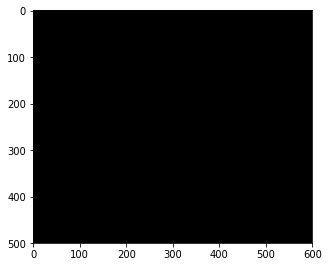

In [34]:
bk = np.zeros((500, 600))
imshow(bk)

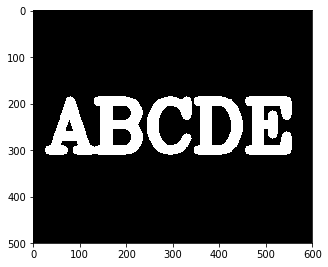

In [35]:
original= cv2.putText(img=bk, text="ABCDE", org=(30, 300), fontFace=cv2.FONT_HERSHEY_COMPLEX, color=(1,1,1), thickness=20, fontScale=5)
imshow(original)

In [217]:
def load():
    bk = np.zeros((500, 600))
    original= cv2.putText(img=bk, text="ABCDE", org=(30, 300), fontFace=cv2.FONT_HERSHEY_COMPLEX, color=(255,255,255), 
                          thickness=20, fontScale=5)
    global img
    img = original.copy()

In [218]:
load()

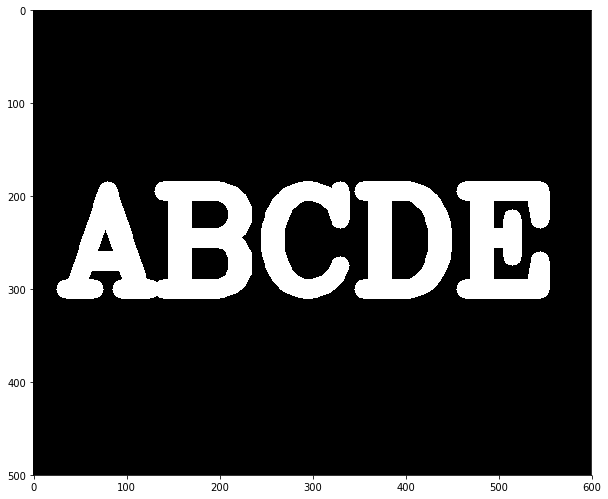

In [219]:
imshow(img)

# ERODE

In [220]:
kernel = np.ones((3,3))
kernel

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [221]:
# "iterations" are very important as they will be give great effect on image due to erosion. higher the iteration higher is the 
# erosion. Iteration tells how many times erosion is to be executed.

# bigger the kernel smaller the iteration is required.
# samller the kernel higher the iteration is required.
# we need to fing best trade off between kernel and iteration

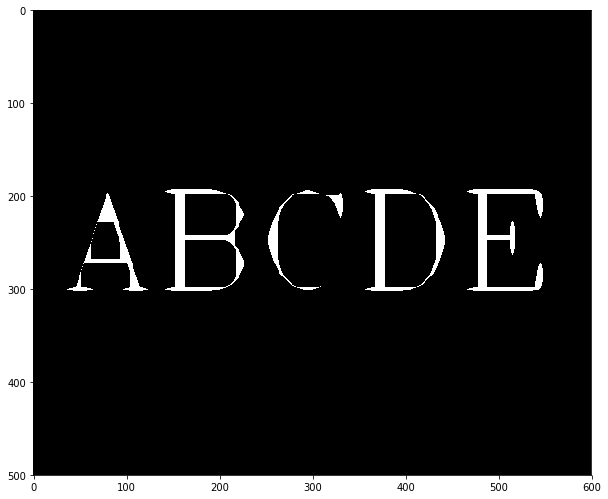

In [222]:
res = cv2.erode(src=img, kernel=kernel, iterations=8)
imshow(res)

# Opening 

In [254]:
# removes background noise
# opening = erosion + dialation

In [255]:
load()

In [256]:
img.shape

(500, 600)

### creating white noise

In [257]:
noise = np.random.randint(0, 2, size=(500, 600))

In [258]:
noise.shape

(500, 600)

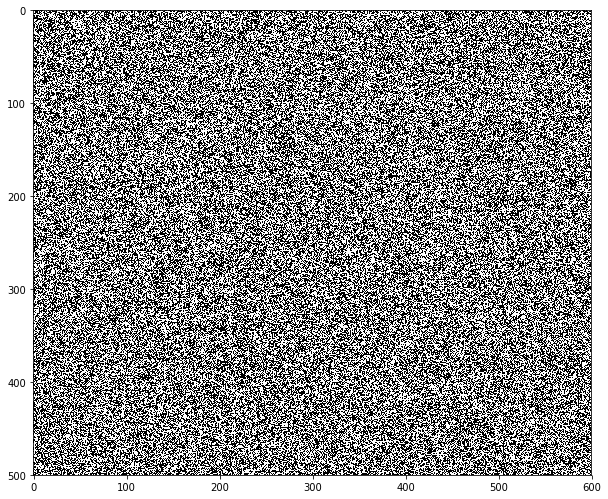

In [259]:
imshow(noise)

In [260]:
noise = noise*255

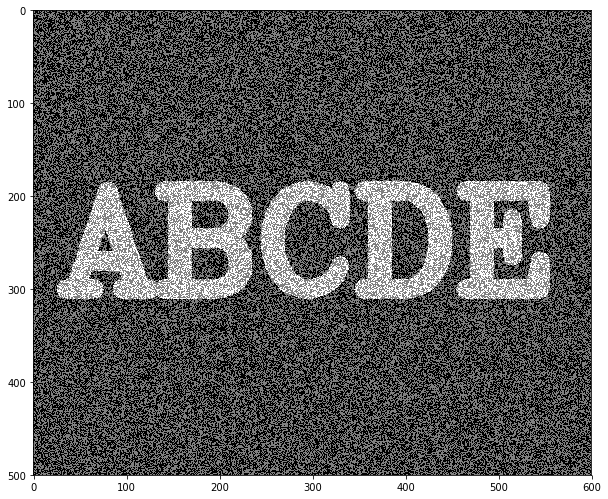

In [261]:
noisy = img+noise
imshow(noisy)

In [262]:
# https://docs.opencv.org/master/d4/d86/group__imgproc__filter.html#ga7be549266bad7b2e6a04db49827f9f32

In [269]:
cleaned = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel, iterations=8)

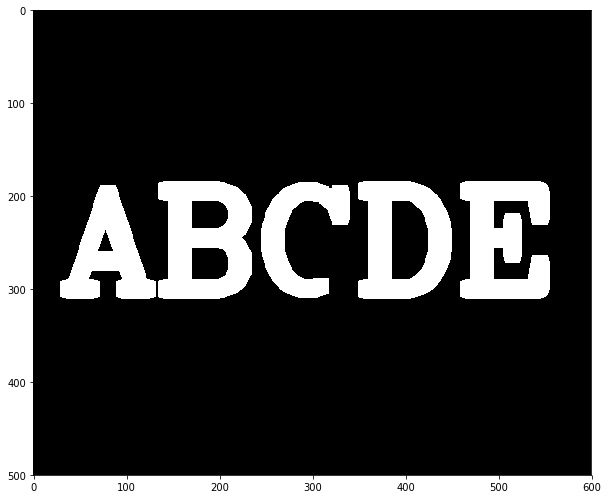

In [270]:
imshow(cleaned)

In [235]:
load()

# Closing

In [271]:
# closing is used to reduce foreground noise
# it is opposite of opening

### creating black noise

In [272]:
noise = np.random.randint(0, 2, size=img.shape)
noise

array([[1, 1, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [1, 0, 1, ..., 0, 1, 0],
       [1, 0, 1, ..., 1, 1, 1],
       [0, 0, 1, ..., 0, 1, 0]])

In [273]:
noise = noise*-255

In [274]:
noise.min()

-255

In [275]:
noise.max()

0

In [276]:
noisyimg = img + noise

In [277]:
noisyimg[noisyimg == -255]=0

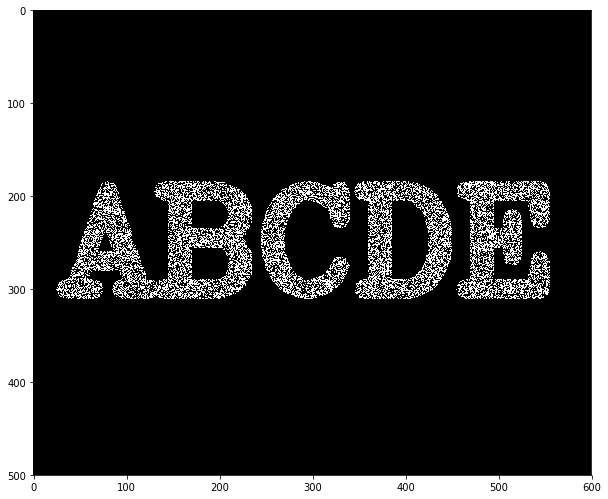

In [278]:
imshow(noisyimg)

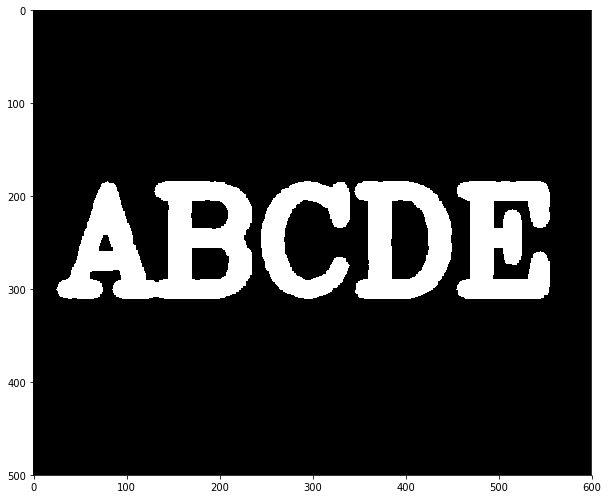

In [285]:
cleaned = cv2.morphologyEx(src=noisyimg, op=cv2.MORPH_CLOSE, kernel=kernel, iterations=2)
imshow(cleaned)

# Gradient

In [288]:
# it takes differnce of erosion and dialation of a image
# this will only detect the edges

In [289]:
load()

In [290]:
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)

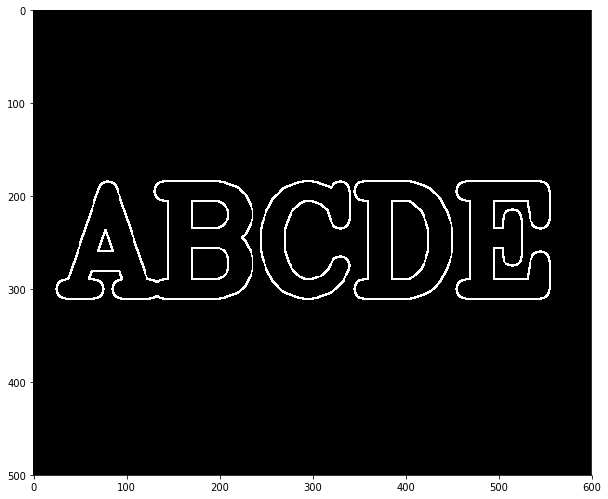

In [291]:
imshow(gradient)